In [6]:
import opensim as osim
from model import Model, Point
import numpy as np

model_osim = osim.Model("./RajagopalLaiUhlrich2023.osim")
state = model_osim.initSystem()

Q = {}
for c in model_osim.getCoordinateSet():
    val = np.random.uniform(-np.pi, np.pi)
    c.setValue(state, val)
    Q[c.getName()] = val

In [13]:
X = osim.Vec3(1,2,3)
A = model_osim.getBodySet().get("ulna_r")
B = model_osim.getBodySet().get("pelvis")

A.findStationLocationInAnotherFrame(state, X, B).to_numpy()

array([-1.82786391,  1.01145763,  2.52575558])

In [15]:
model = Model.from_opensim(model_osim)

X = Point(1,2,3)
A = model.body("ulna_r")
B = model.body("pelvis")

A.express_in(Q, X, B)

Point(x=-1.8277326958216, y=1.01147841059248, z=2.52583977569689)

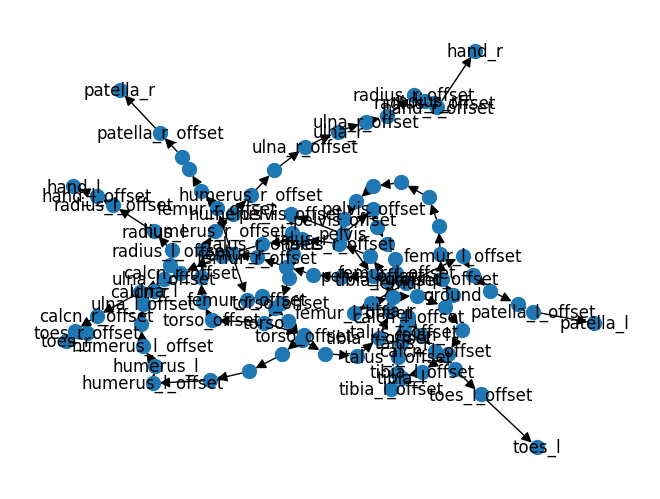

In [12]:
model.draw_graph()

In [ ]:
X = Point(1,2,3)
A = model.body("ulna_r")
B = model.body("toes_l")

In [9]:
coefs = [1,2,3,4]
PF = osim.PolynomialFunction(osim.Vector(coefs))

print(PF.getArgumentSize())
PF.calcValue(osim.Vector([-5]))
# PF.calcDerivative(1, osim.Vector([-5]))

1


-86.0

In [10]:
PF.getCoefficients().to_numpy()

array([1., 2., 3., 4.])

In [4]:
from functions import Polynomial

PF2 = Polynomial("n", coefs)
PF2.eval("x")

1 + 2*x + 3*x**2

In [5]:
print(PF2.coefficients[::-1])

[3, 2, 1]


In [6]:

PF2.derivative("x")

2 + 3*x

In [7]:

PF2.eval("x")

1 + 2*x + 3*x**2